In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os

In [3]:
path=os.listdir(r'D:\Aje\Data Science\dataset\Lumpy Skin Images Dataset\Lumpy Skin Images Dataset')
classes={'Normal Skin':0,'Lumpy Skin':1}

In [1]:
import cv2

In [5]:
import cv2
X = []
Y = []
for cls in classes:
    th = r'D:\\Aje\\Data Science\\dataset\\Lumpy Skin Images Dataset\\Lumpy Skin Images Dataset\\'+cls
    for j in os.listdir(th):
        img = cv2.imread(th+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [6]:
np.unique

<function numpy.unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None, *, equal_nan=True)>

In [7]:
X = np.array (X)
Y = np.array(Y)

In [8]:
pd.Series(Y).value_counts()

0    700
1    315
dtype: int64

In [9]:
X.shape

(1015, 200, 200)

In [10]:
X_updated=X.reshape(len(X), -1)
X_updated.shape

(1015, 40000)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X_updated,Y,random_state=10,test_size=0.20)

In [12]:
X_train.shape, X_test.shape

((812, 40000), (203, 40000))

In [13]:
print(X_train.max(),X_train.min())
print(X_test.max(),X_test.min())
X_train=X_train/255
X_test=X_test/255
print(X_train.max(),X_train.min())
print(X_test.max(),X_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [14]:
from sklearn.decomposition import PCA

In [15]:
pca=PCA(0.98)
pca_train=X_train
pca_test=X_test

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
import warnings
warnings.filterwarnings('ignore') 

lg=LogisticRegression(C=0.1)
lg.fit(pca_train,y_train)

LogisticRegression(C=0.1)

In [18]:
sv=SVC()
sv.fit(pca_train,y_train)

SVC()

In [19]:
print("training Score:",lg.score(pca_train,y_train))
print("testing Score:",lg.score(pca_test,y_test))

training Score: 0.9975369458128078
testing Score: 0.7093596059113301


In [20]:
print("training Score:",sv.score(pca_train,y_train))
print("testing Score:",sv.score(pca_test,y_test))

training Score: 0.896551724137931
testing Score: 0.7783251231527094


In [21]:
pred=sv.predict(pca_test)
np.where(y_test!=pred)

(array([  0,   3,   6,  10,  11,  18,  22,  29,  31,  35,  37,  41,  48,
         49,  65,  71,  72,  75,  76,  77,  92,  93,  96, 102, 106, 109,
        117, 118, 119, 120, 135, 139, 143, 151, 154, 157, 159, 162, 164,
        174, 176, 180, 183, 189, 201], dtype=int64),)

In [22]:
pred[6]

0

In [23]:
y_test[7]

0

In [24]:
dec={0:'Normal Skin',1:'Lumpy Skin'}

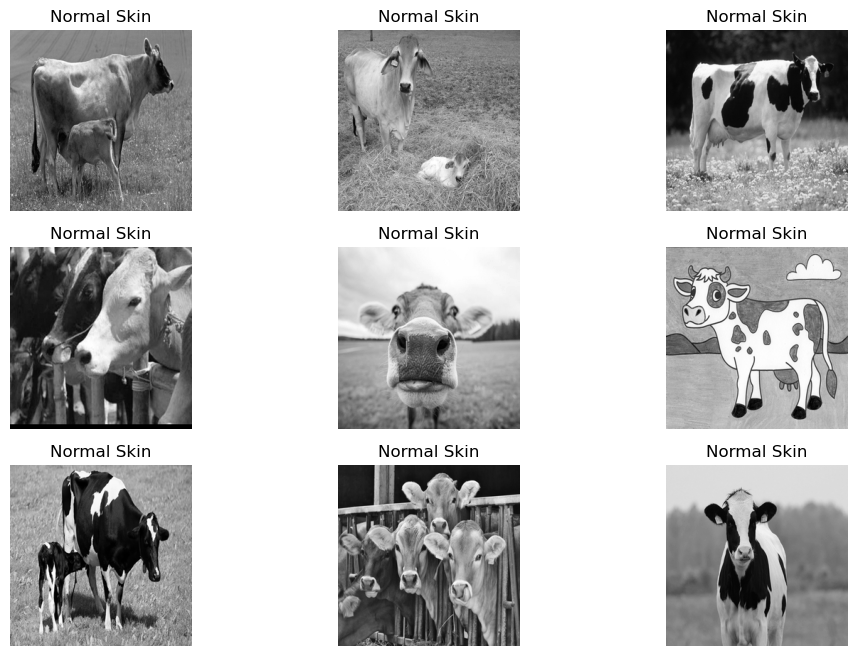

In [25]:
plt.figure(figsize=(12,8))
p = os.listdir(r'D:\Aje\Data Science\dataset\Lumpy Skin Images Dataset\Lumpy Skin Images Dataset')
c=1
for i in os.listdir(r'D:\Aje\Data Science\dataset\Lumpy Skin Images Dataset\Lumpy Skin Images Dataset\Normal Skin')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'D:\\Aje\\Data Science\\dataset\\Lumpy Skin Images Dataset\\Lumpy Skin Images Dataset\\Normal Skin\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

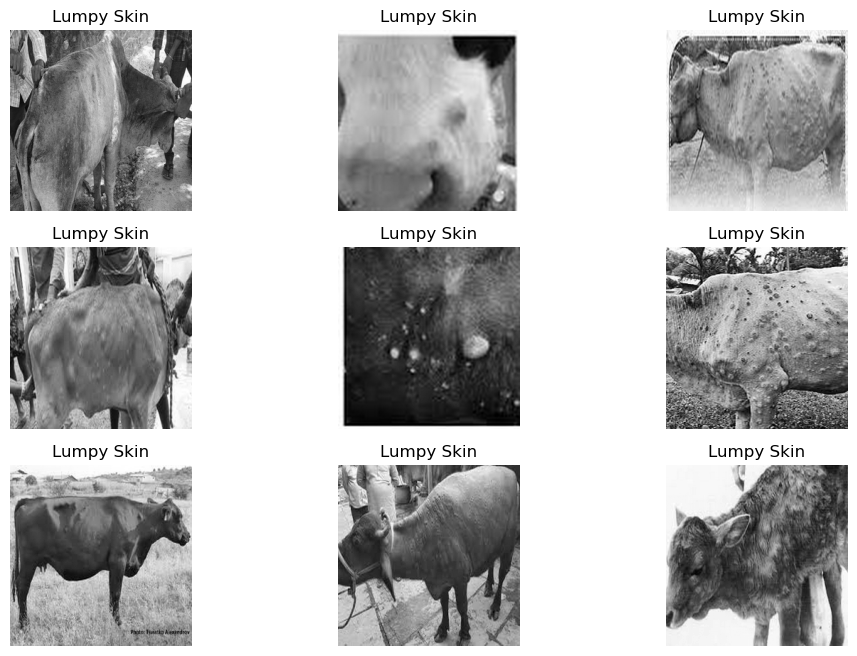

In [26]:
plt.figure(figsize=(12,8))
p = os.listdir(r'D:\Aje\Data Science\dataset\Lumpy Skin Images Dataset\Lumpy Skin Images Dataset')
c=1
for i in os.listdir(r'D:\Aje\Data Science\dataset\Lumpy Skin Images Dataset\Lumpy Skin Images Dataset\Lumpy Skin')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'D:\\Aje\\Data Science\\dataset\\Lumpy Skin Images Dataset\\Lumpy Skin Images Dataset\\Lumpy Skin\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [27]:
y_pred =sv.predict(X_test)

In [28]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

Accuracy 0.7783251231527094
